In [0]:
import numpy as np
import pandas as pd

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('input/visits.csv', parse_dates=['published'], index_col='published')
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134137 entries, 2008-01-01 18:19:00 to 2016-10-31 23:56:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   post_id  134137 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


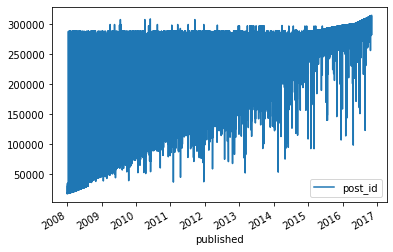

In [0]:
df.plot();

In [0]:
#  How many articles were created per year
df.resample('1Y').count()

,post_id
published,
2008-12-31,7743
2009-12-31,10783
2010-12-31,13091
2011-12-31,15063
2012-12-31,15972
2013-12-31,15537
2014-12-31,16180
2015-12-31,23452
2016-12-31,16316


In [0]:
#  How many articles were created per month
df.resample('1M').count()

,post_id
published,
2008-01-31,435
2008-02-29,496
2008-03-31,545
2008-04-30,597
2008-05-31,635
...,...
2016-06-30,1498
2016-07-31,1278
2016-08-31,1278


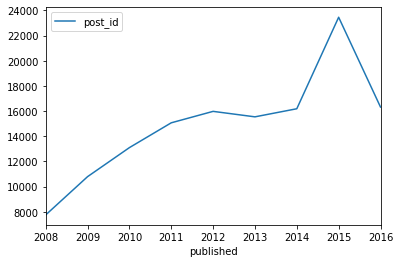

In [0]:
df.resample('1Y').count().plot();

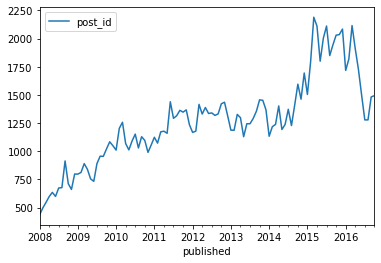

In [0]:
df.resample('1M').count().plot();

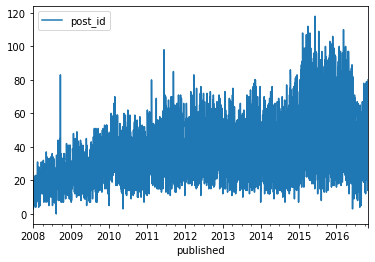

In [0]:
df.resample('1D').count().plot();

In [0]:
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [0]:
df_day = df.resample('1D').count().reset_index()
df_day.columns = ['ds', 'y']

df_day

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
...,...,...
3222,2016-10-27,58
3223,2016-10-28,53
3224,2016-10-29,14
3225,2016-10-30,27


# **Forecasting 30 points ahead**

In [0]:
num_points_to_pred = 30

#  Points from the beginning without the last 30 points from the end
train = df_day[:-num_points_to_pred]
#  Points from last 30 points from the end
test = df_day[-num_points_to_pred:]

In [0]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=num_points_to_pred, freq='D', include_history=True)
future

,ds
0,2008-01-01
1,2008-01-02
2,2008-01-03
3,2008-01-04
4,2008-01-05
...,...
3222,2016-10-27
3223,2016-10-28
3224,2016-10-29
3225,2016-10-30


In [0]:
forecast = m.predict(future)

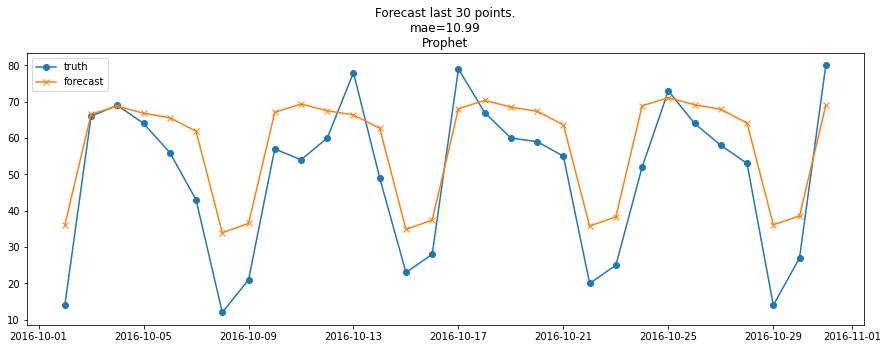

In [0]:
def plot_forecast(test, forecast):
  forecast = forecast[-num_points_to_pred:]
  score = np.round( mae(test.y, forecast.yhat), 2)

  plt.figure(figsize=(15, 5))
  plt.title('Forecast last {} points.\nmae={}\nProphet'.format(num_points_to_pred, score))
  plt.plot(test.ds, test.y, 'o-', label='truth')
  plt.plot(test.ds, forecast.yhat, 'x-', label='forecast')
  plt.legend();

plot_forecast(test, forecast)

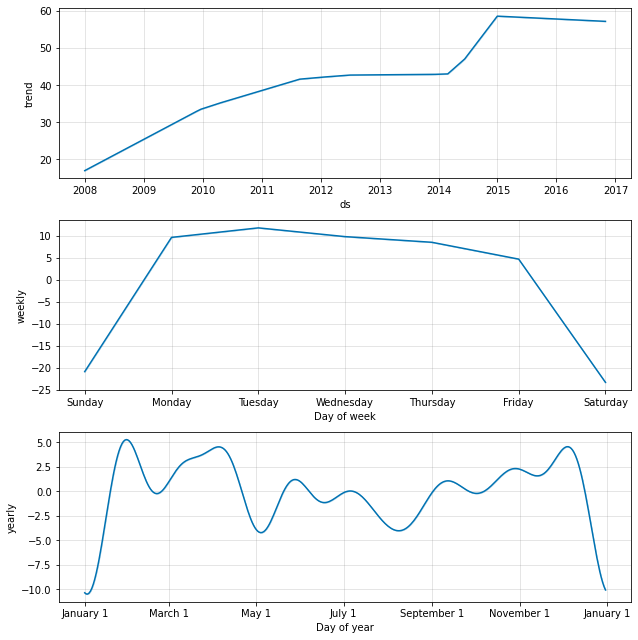

In [0]:
m.plot_components(forecast);